In [1]:
import math
import os
import pandas as pd

path = "./data/egonets/"
egonets = os.listdir(path)
fileNames = []

edge_count = []
maximum_edge_count = []
edge_density = []
egoNetNames = []
peopleCount = []

#create adjacency lists for each ego network; 
#adjacency list is a list of ordered tuples representing a pair of people who are connected
#pairs do not repeat

#number of edges is calculated per ego network (edge_count)
#edge density is calculated per ego network as ratio of actual edge count to all possible pairs between people included in ego network

i = 0    
for file in egonets:
    egoNet = open(path+file)
    lines=egoNet.readlines()
    lines = map(lambda x: x[:-1], lines)
    adj_egoNet = set()
    egoNet_i = []
    #we have list of lines of some egonet file
    for line in lines:
        line=line.split(': ')
        egoNet_i.append(line)
    for item in egoNet_i:
        if int(file[:-7]) < int(item[0]):
            adj_egoNet.add((file[:-7], item[0]))
        else:
            adj_egoNet.add(item[0]), (file[:-7])
    for row in egoNet_i:
        id1 = row[0]
        friends = row[1].split()
        for k in friends:
            if int(id1) < int(k):
                adj_egoNet.add((id1, k))
            else:
                adj_egoNet.add((k, id1))
    peopleCount.append(len(egoNet_i)+1)
    egoNetNames.append(file[:-7])
    edge_count.append(len(adj_egoNet))
    maximum_edge_count.append(math.factorial(len(egoNet_i) + 1)/(math.factorial(len(egoNet_i) + 1 - 2)*math.factorial(2)))
    edge_density.append(edge_count[i] / maximum_edge_count[i])
    
    adj_egoNet = list(adj_egoNet)
    adj_egoNet = sorted(adj_egoNet, key=lambda x: [int(x[0]), int(x[1])])
    adj_egoNet_file = open("./data/egonets_adj/adj_egoNet{0}.txt".format(file[:-7]),"w") 
 
    s = ''
    for elem in adj_egoNet:
        s = s + str(elem[0]) + ' ' + str(elem[1]) + '\n'
    adj_egoNet_file.write(s) 

    adj_egoNet_file.close()
    i+=1

In [3]:
edgeStructure = {'peopleCount': peopleCount, 'edge_count': edge_count, 'maximum_edge_count': maximum_edge_count, 'edge_density': edge_density}
df_edgeStructure = pd.DataFrame(data=edgeStructure, index=egoNetNames)
df_edgeStructure.head(5)

,peopleCount,edge_count,maximum_edge_count,edge_density
0,239,4448,28441.0,0.156394
10395,398,7140,79003.0,0.090376
10793,136,1574,9180.0,0.171460
10929,85,413,3570.0,0.115686
1099,211,1414,22155.0,0.063823


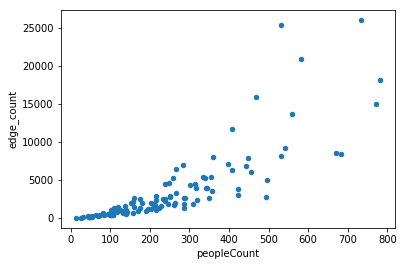

In [5]:
ax1 = df_edgeStructure.plot.scatter(x='peopleCount',
...                       y='edge_count')

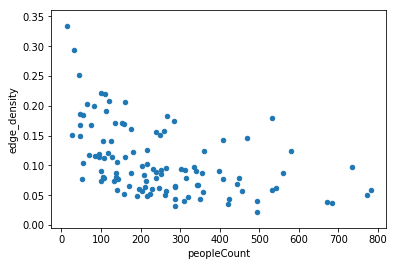

In [6]:
ax2 = df_edgeStructure.plot.scatter(x='peopleCount',
...                       y='edge_density')